# Import libraries


In [691]:
import numpy as np
import pandas as pd

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

## import date libraries
import datetime

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#modelling libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## metrics
from sklearn import linear_model,metrics
from sklearn.metrics import mean_squared_error,r2_score

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## automation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


## Reading and Understanding the Data


In [692]:
housing = pd.read_csv('train (1).csv')

In [693]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [694]:
## No of records in dataset
housing.shape

(1460, 81)

In [695]:
## checking info of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [696]:
## Descriptive statitsics
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Feature Analysis

Lets group numerical and categorical variables and perform annalysis separately


##### Split the features into numerical and categorical

In [697]:
df_numeric = housing.select_dtypes(include=['int64','float64'])
df_categorical = housing.select_dtypes(include=['object'])

##### Numerical Features

In [698]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


## Detect Outliers

#### Calculate the outliers for each numerical feature in percentages

In [699]:
outliers_percentage = {}

for feature in df_numeric.columns:
    IQR = df_numeric[feature].quantile(.75)-df_numeric[feature].quantile(.25)
    outliers_count = df_numeric[(df_numeric[feature] > (df_numeric[feature].quantile(.75)+1.5*IQR)) | (
    df_numeric[feature] < (df_numeric[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature] = round(
    outliers_count/df_numeric.shape[0]*100,2)
    
outliers_df = pd.DataFrame({'Features':list(
    outliers_percentage.keys()), 'Percentage': list(outliers_percentage.values())})
outliers_df.sort_values(by="Percentage",ascending = False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


Observation:
- out of 19 17 numerical features have outliers
- good idea is to treat the outliers which are in high percentage instead of dropping them

## Outlier Treatment

##### Inter Quartile Range = Difference between 75th percentile and 25th percentile 

In [700]:
## Equate all values outside IQR to the minimum and maximum values
# values < 25 percentile - 1.5* IQR ==> Lowest data point in the dataset excluding any outliers
# values > 75 percentile + 1.5* IQR ==> Highest data point in the dataset excluding any outliers
# Excluding the response variable

for feature in outliers_percentage.keys():
    if feature != 'SalesPrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25)
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] < min_value] = min_value
        housing[feature][housing[feature] > max_value] = max_value
        


In [701]:
## get the statistics of summary of data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,177331.526370
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,67205.835915
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,340037.500000


**Observations**:
- Some Features like 'WooddeckSF', 'OpenForchSF','PoolArea','MiscVal have zero variance
- 'MSSubClass','OverallCond','OverallEqual' are categorical features
- 'YearBuilt','YearRemodAdd','YrSold' are date columns

## Data Visulaization

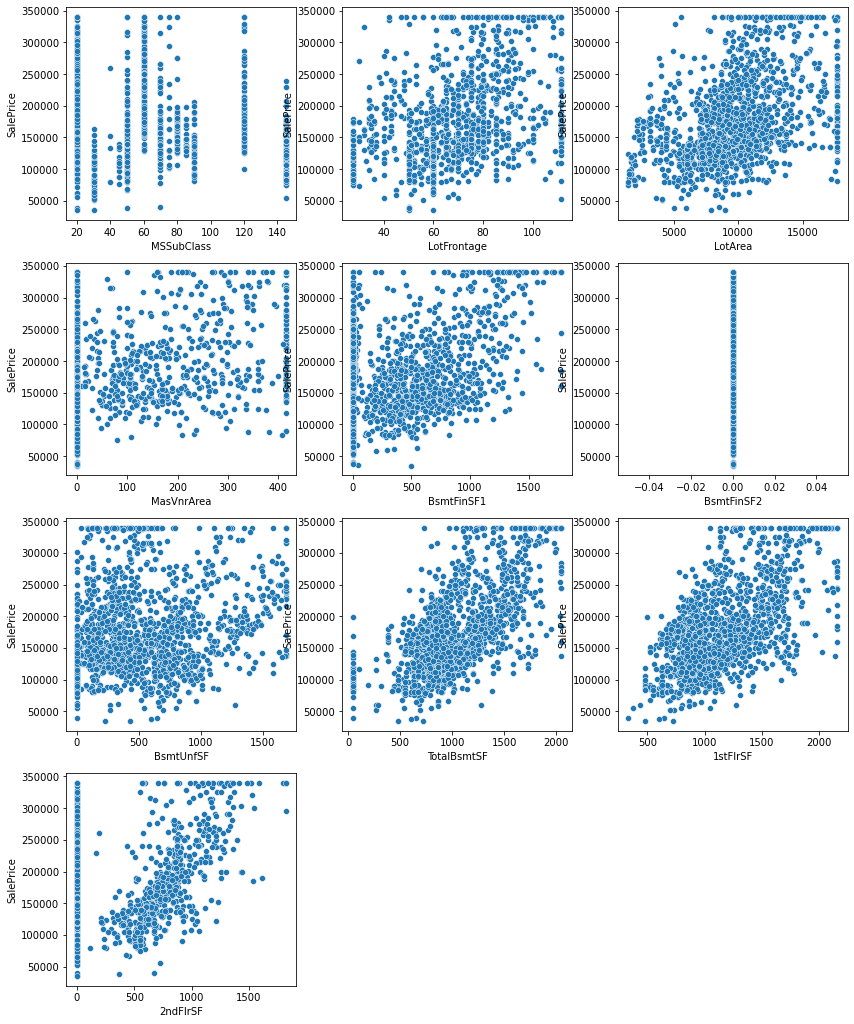

In [702]:
## visulaization plots for Contineous variables
fig = plt.subplots(figsize=(14,18))

for i,feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(4,3,i+1)
    sns.scatterplot(housing[feature],housing['SalePrice'])
    
                        

**observations**:
- 'MSSubClass' has discrete values
- 'LotFrontage','LotArea','1stFlrSF','2ndFlrSF' have positive correlation with SalePrice

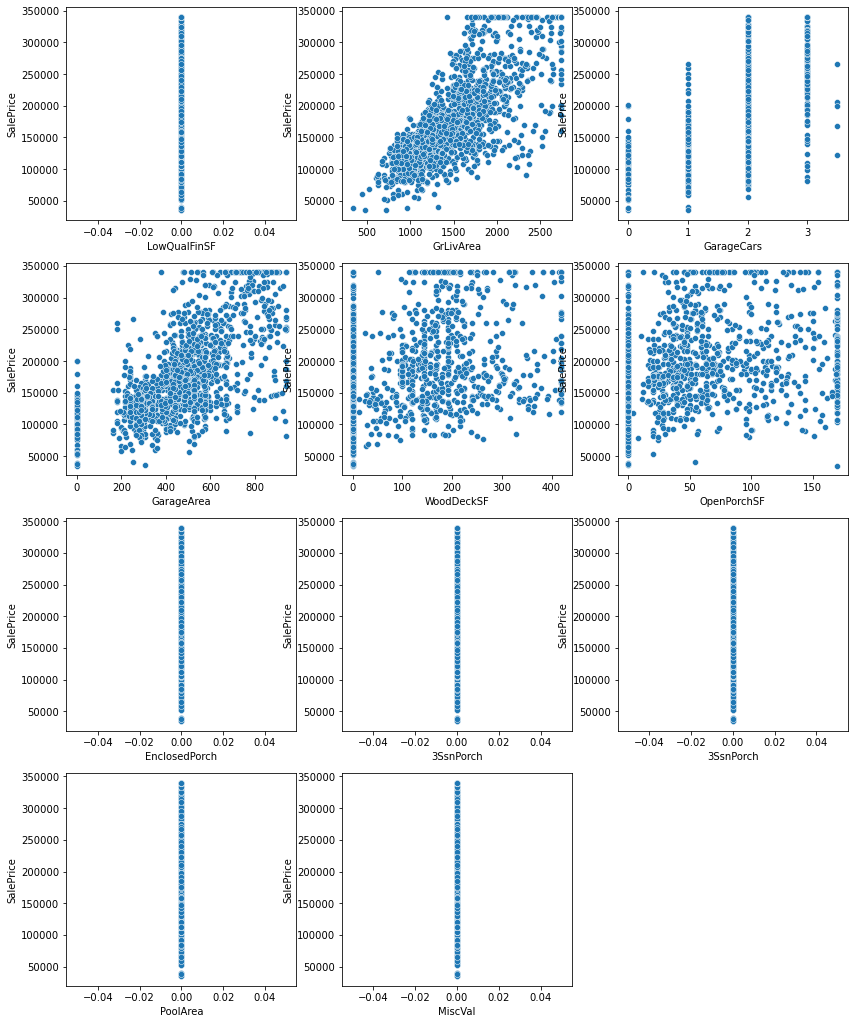

In [703]:
## visulaization plots for Contineous variables
fig = plt.subplots(figsize=(14,18))

for i,feature in enumerate(['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','3SsnPorch','PoolArea','MiscVal']):
    plt.subplot(4,3,i+1)
    sns.scatterplot(housing[feature],housing['SalePrice'])

**observations**:
- 'GrLivArea','GarageArea' variables  shows positive correlation with SalePrice
- 'GarageCars' is a categorical feature
-  'LowQualFinSF','EnclosedPorch','3SsnPorch','3SsnPorch','PoolArea','MiscVal' have only single value and does not have influence on dependent variable


## Distribution of SalePrice

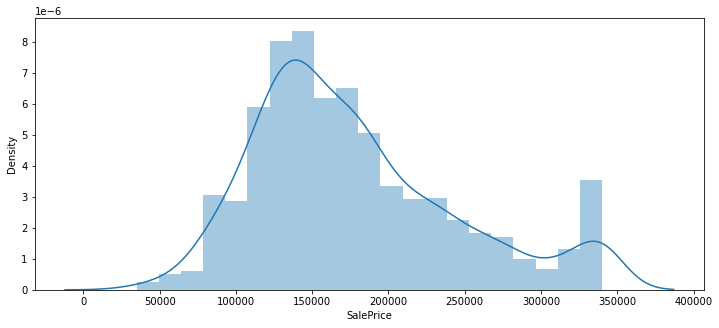

In [704]:
## plot a distribution chart of 'SalePrice'
plt.figure(figsize = (12,5))
sns.distplot(housing['SalePrice'])
plt.show()

**Observations**:

- SalePrice is rightly skewed

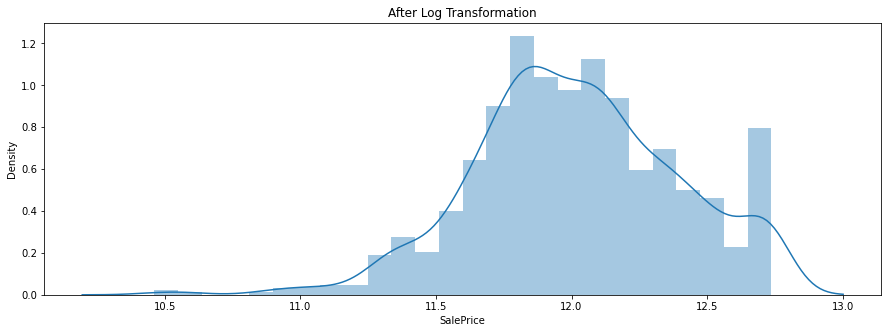

In [705]:
## plot a distribution chart of log of 'SalePrice'
plt.figure(figsize = (15,5))
sns.distplot(np.log(housing['SalePrice']))
plt.title("After Log Transformation")
plt.show()

**Observation**:

- 'SalePrice' is normally distributed around the center by taking log value 

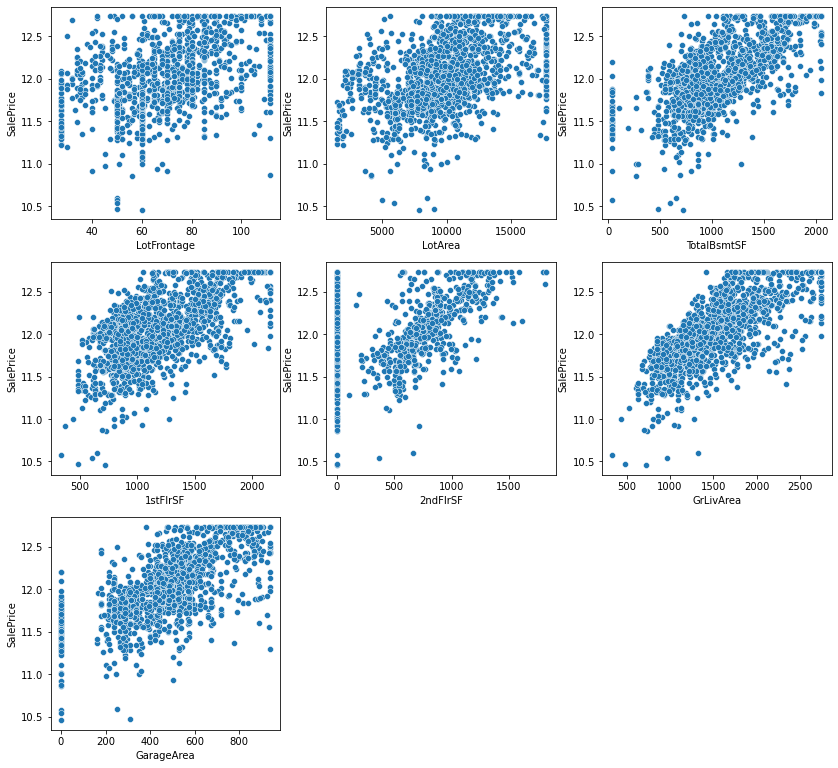

In [706]:

## plotting the log value of SalePrice against the variables those which are shows linear relationship


fig = plt.subplots(figsize=(14,18))

for i,feature in enumerate(['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']):
    plt.subplot(4,3,i+1)
    sns.scatterplot(housing[feature],np.log(housing['SalePrice']))


**Observation**:

- linear relationship exist between all the variables with log of SalePrice

In [707]:
# changing 'SalePrice' is now log('Saleprice')
housing['SalePrice'] = np.log(housing['SalePrice'])

## Correlation


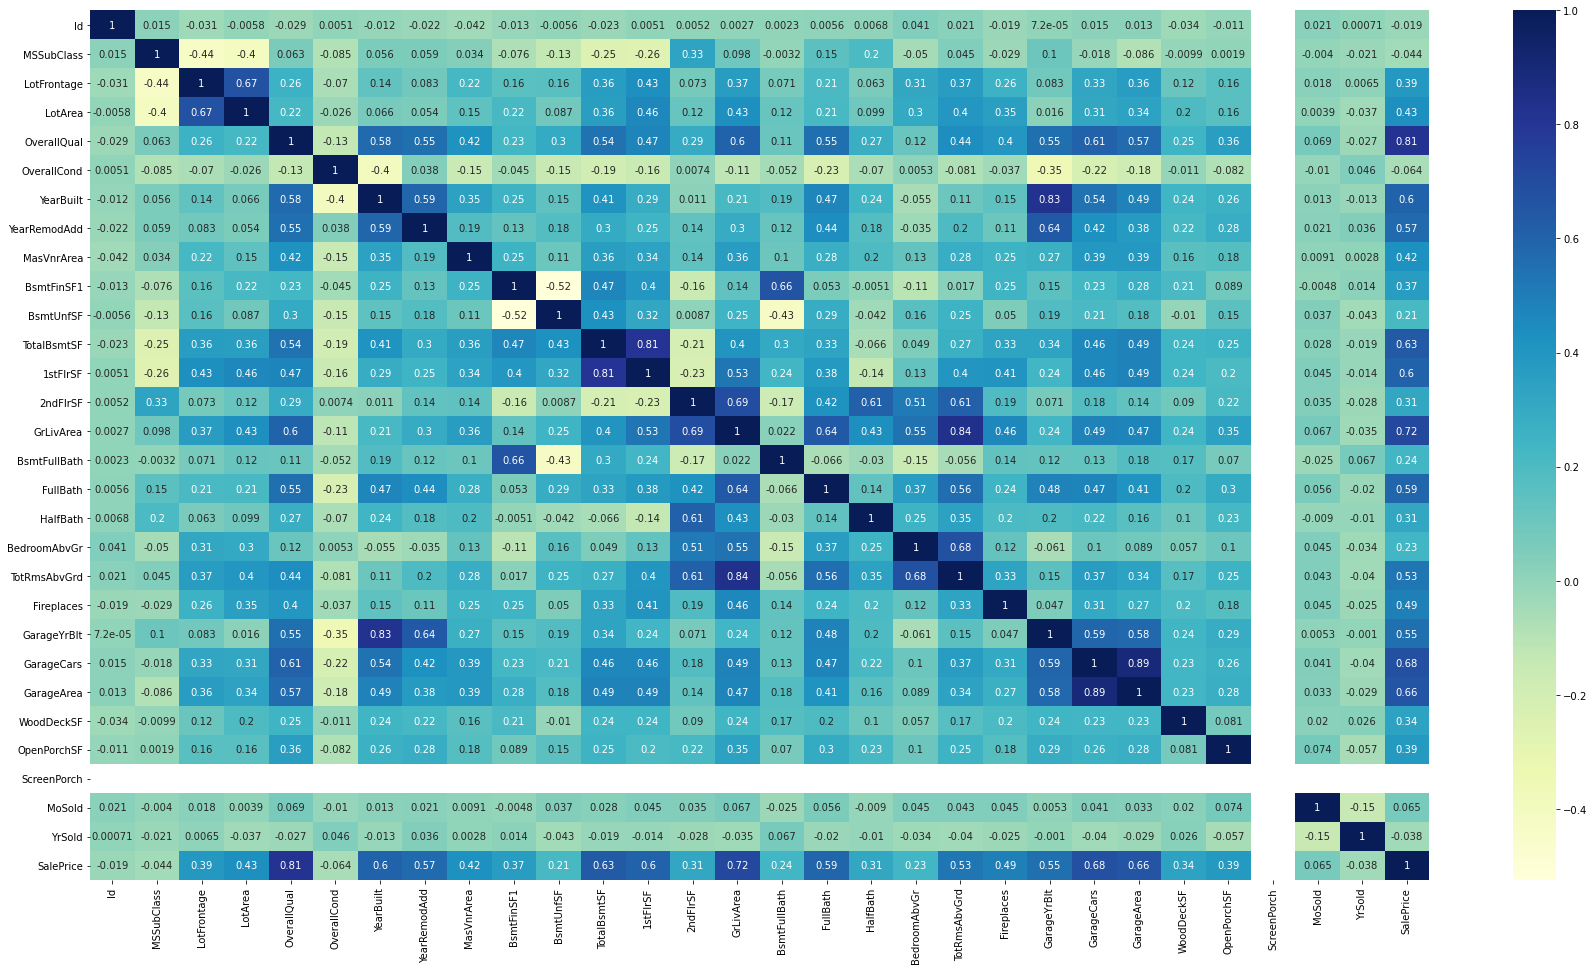

In [708]:
## plot a heatmap 
plt.figure(figsize = (30,16))
sns.heatmap(housing.loc[:,~housing.columns.isin(['EnclosedPorch','3SsnPorch','3SsnPorch','PoolArea','MiscVal','BsmtFinSF2','LowQualFinSF','BsmtHalfBath', 'KitchenAbvGr'])].corr(),cmap='YlGnBu',annot = True)
plt.show()

**Observations**:
- 'SalePrice' and 'OverallQual' share high positive correlation - better the finish/quality, higher the price
- 'YearBuilt' and GarageYrBlt have high correlation between them
- '1stFlrSF' is correlated with the 'TotalBsmntSF'- the size of first floor will depend on size of total basement area.
- 'TotalBsmtSF','1stFlrSF,'GrLivArea,'GarageArea' show strong positive correlation with SalePrice 
- GarageArea and Garage Cars have a high correlation 
- GrLivArea and TotRmsAbvGrd shows good correlation
    
    

In [709]:
housing.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [710]:
## analysing the features that comes up as blank in heatmap

housing[['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr']].describe().T

,count,mean,std,min,25%,50%,75%,max
EnclosedPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3SsnPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ScreenPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PoolArea,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MiscVal,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtFinSF2,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtHalfBath,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KitchenAbvGr,1460.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


observations:
 drop the features which have fixed values and 0 variance.

In [711]:
housing.drop(columns=['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                      'MiscVal','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr'],inplace = True)

As already seen from heatmap
- GarageCars and GarageArea(correlation coefficient=0.89)so drop GarageCars
- GarageYrBlt and YearBuilt(correlation coefficient=0.83)so drop GarageYrBlt
- TotRmsAbvGrd and GrLivArea(correlation coefficient=0.83)so drop GrLivArea
- TotalBsmtSF and 1stflrSF(correlation coefficient=0.81)so drop TotalBsmtSF


In [712]:
## Dropping the highly correlated features seen from above heatmap and also drop the redundant column 'ID'

housing.drop(columns=['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF','Id'],inplace = True)

In [713]:
## Get remaining features
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice

### Discrete variables

Lets analyse the discrete variables picked out from data dictionary.

In [714]:
housing[['OverallQual','OverallCond','MoSold','YrSold','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd',
         'Fireplaces','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,2,1,3.0,8,0.0,2003,2003
1,6,7.5,5,2007,2,0,3.0,6,1.0,1976,1976
2,7,5.0,9,2008,2,1,3.0,6,1.0,2001,2002
3,7,5.0,2,2006,1,0,3.0,7,1.0,1915,1970
4,8,5.0,12,2008,2,1,4.0,9,1.0,2000,2000
5,5,5.0,10,2009,1,1,1.0,5,0.0,1993,1995
6,8,5.0,8,2007,2,0,3.0,7,1.0,2004,2005
7,7,6.0,11,2009,2,1,3.0,7,2.0,1973,1973
8,7,5.0,4,2008,2,0,2.0,8,2.0,1931,1950
9,5,6.0,1,2008,1,0,2.0,5,2.0,1939,1950


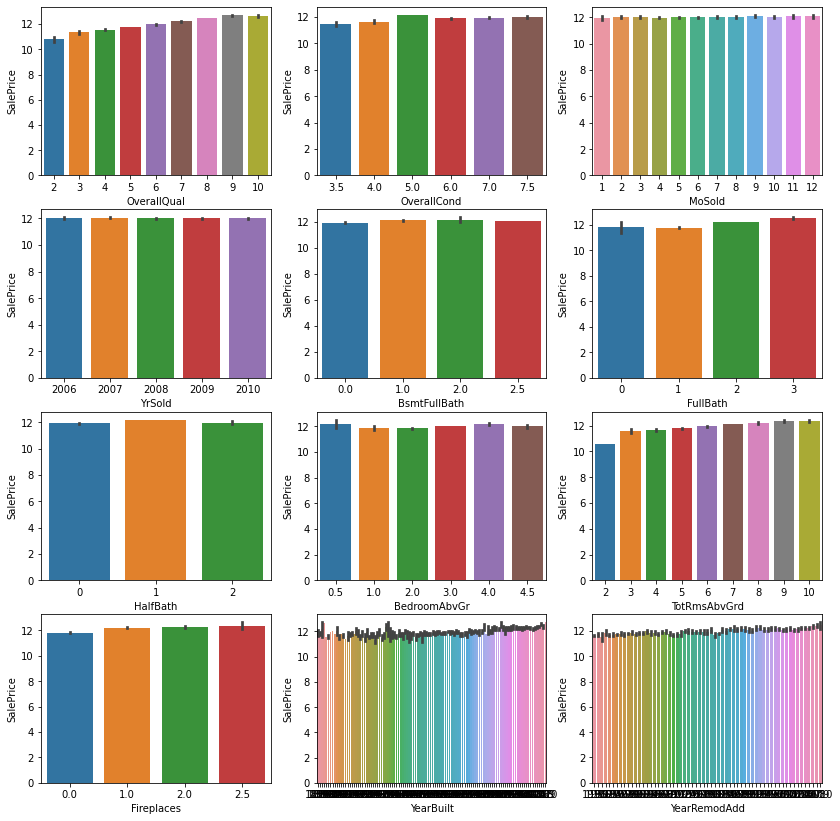

In [715]:
fig = plt.subplots(figsize=(14,18))

for i , feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd',
         'Fireplaces','YearBuilt','YearRemodAdd']):
    plt.subplot(5,3,i+1)
    sns.barplot(housing[feature],housing['SalePrice'])

**observations**:
- 'SalePrice'rises as per as 'OverallQual' rises
- 'OverallCond' with 5.0 has selling Price
- Houses with 1 halfbath and 3 full Bath shows higher selling rates
- 'MoSold','yrSold' have no influence on SalePrice
- SalePrice increases as TotRmsAbvGrd increases


#### Feature including years

##### Lets look at the features with years
- YearBuilt: Orginal Construction date
-YrSold: Year sold
-YearRemodAdd: Remodel Date
-GarageYrBlt:Year Garage was built

In [716]:
## Descriptive Statistics
housing[['YearBuilt','YearRemodAdd','YrSold']].describe()

,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000
mean,1971.299315,1984.865753,2007.815753
std,30.108397,20.645407,1.328095
min,1885.000000,1950.000000,2006.000000
25%,1954.000000,1967.000000,2007.000000
50%,1973.000000,1994.000000,2008.000000
75%,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000


### Sanity checks

YearBuilt should be less than YrSold

In [717]:
(housing.YearBuilt > housing.YrSold).sum()

0

YearBuilt should be less than YrRemodAdd

In [718]:
(housing.YearRemodAdd < housing.YearBuilt).sum()

0

YearBuilt should be less than YrRemodAdd

In [719]:
(housing.YearRemodAdd > housing.YrSold).sum()

1

Here ,one record has Remodelling Date that comes house after house was sold


In [720]:
print('Remodel Date:' , housing[housing.YearRemodAdd>housing.YrSold].YearRemodAdd.values)
print('Year sold',housing[housing.YearRemodAdd>housing.YrSold].YrSold.values)

Remodel Date: [2008]
Year sold [2007]


In [721]:
## dropping this record

housing = housing[housing.YearRemodAdd <= housing.YrSold]

In [722]:
housing.shape

(1459, 67)

Converting Years to Age:

it makes more sense to compare the **age** of the building rather than year it was built.

In [723]:
## Calculate Age and reassign it to the year for each of these features
for feature in ['YearBuilt','YearRemodAdd','YrSold']:
    housing[feature] = datetime.date.today().year - housing[feature]

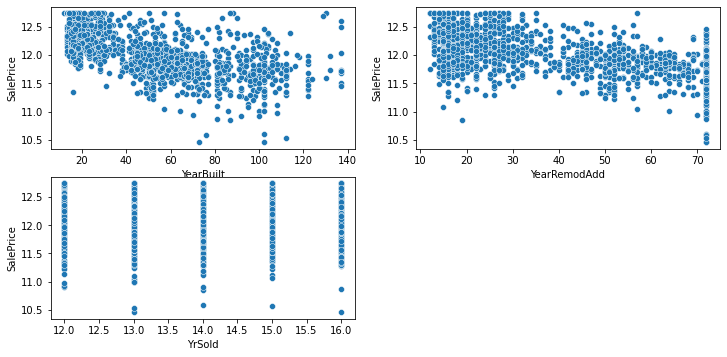

In [724]:
fig = plt.subplots(figsize = (12,12))

for i , feature in enumerate(['YearBuilt','YearRemodAdd','YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(housing[feature],housing['SalePrice'])

Observations:

- 'SalePrice' goes down as the house gets older evident from 'YearBuilt' and 'yearRemodAdd'.
- 'OverallCond' with 5.0 has highest selling price
- YrSold does not show any significant trend

### Missing Value Treatment

#### Numerical features

In [725]:
missing_percentage = {}

for feature in housing.select_dtypes(exclude=['object']).columns:
    if housing[feature].isna().any():
        missing_percentage[feature] = round(
            housing[feature].isna().sum()/len(housing) * 100,2)
        
missing_df = pd.DataFrame({'Features':list(
    missing_percentage.keys()),'Percentage':list(missing_percentage.values())})
missing_df.sort_values(by="Percentage",ascending = False)

        
        

,Features,Percentage
0,LotFrontage,17.75
1,MasVnrArea,0.55


#### MasVnrArea

Drop rows with missing_records of 'MasVnrArea' as it is less than 1% of the total records

In [726]:
housing = housing[~housing['MasVnrArea'].isna()]





#### LotFrontage

More than 17% of data missing so we cannot drop the rows.
Lets check the distribution



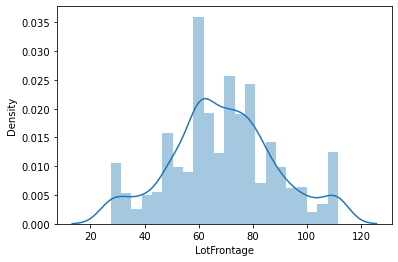

In [727]:
sns.distplot(housing.LotFrontage)
plt.show()

Observations:

- it has less outliers and distribution is rightly skewed

Since, distribution is not perfect,replace NA valueswith median values

In [728]:
housing.LotFrontage.replace(np.nan,housing.LotFrontage.median(),inplace = True)

In [729]:
housing.LotFrontage.isna().sum()

0

In [730]:
housing.shape

(1451, 67)

## Categorical Features

In [731]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Treatment

In [732]:
missing_percentage = {}

for feature in housing.select_dtypes(include=['object']).columns:
    if housing[feature].isna().any():
        missing_percentage[feature] = round(
            housing[feature].isna().sum()/len(housing) * 100,2)
        
missing_df = pd.DataFrame({'Features':list(
    missing_percentage.keys()),'Percentage':list(missing_percentage.values())})
missing_df.sort_values(by="Percentage",ascending = False)

,Features,Percentage
12,PoolQC,99.52
14,MiscFeature,96.28
0,Alley,93.80
13,Fence,80.63
7,FireplaceQu,47.28
8,GarageType,5.58
9,GarageFinish,5.58
10,GarageQual,5.58
11,GarageCond,5.58
3,BsmtExposure,2.62


Observations:
- 'PoolQC' has over 99.5% missing values while 'Electrical' has less than 1% missing records against total records.
- For 'Alley' , NA = "No accesstoalley"
- NA is 'No Basement' for 'BsmtQual	','BsmtCond','BsmtExposure','BsmtFinType2',BsmtFinType1
- Similarily, for GarageType,GarageFinish,GarageQual,GarageCond NA deontes 'No Garage'
- For FireplaceQu and Fence NA means 'No Fire Place' and 'No fence'
- MiscFeature - NA says No miscallaneous present.


In [733]:
## Drop 'PoolQC' feature as 99.99% of the houses have 'No Pool'
housing.drop(columns = 'PoolQC', inplace = True)

In [734]:
## drop the records with missing records of Electrical
housing = housing[~housing['Electrical'].isna()]

In [735]:
housing.shape

(1450, 66)

#### Data Imputation

In [736]:
## find the msiing records for all the categorical features
df_categorical_missing = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','FireplaceQu','Fence','MiscFeature']
housing[df_categorical_missing].isna().sum().sort_values(ascending = False)

MiscFeature     1396
Alley           1360
Fence           1169
FireplaceQu      685
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64

In [737]:
## Impute NA values as "Not applicable"
housing[df_categorical_missing] = housing[df_categorical_missing].apply(lambda x: x.fillna(value = "Not Applicable"))

In [738]:
## cross check for missing value post imputation
print(housing[df_categorical_missing].isna().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [739]:
housing.shape

(1450, 66)

#### Ordinal features

- 'LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
  'BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageCond' and 'CentralAir

In [740]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      

#### Nominal features

'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

##### comapre the Saleprice against every categorical valueusing boxplot 

In [741]:
## function for SalePrice against Categorical Feature
def draw_boxplot(features):
    fig = plt.subplots(figsize=(20,14))
    for i , feature in enumerate(features):
        plt.subplot(4,2,i+1)
        sns.boxplot(housing[feature],housing['SalePrice'])
    

As we have many categorical features to analyse, lets group them and examine each group

#### Exterior features

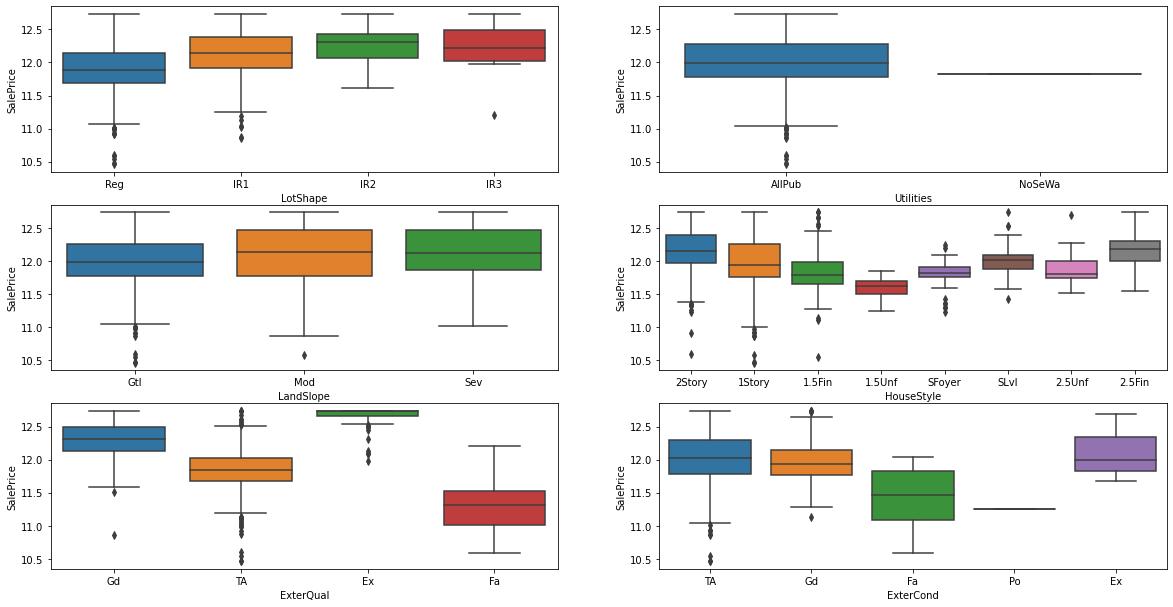

In [742]:
ext_features = ['LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond']
draw_boxplot(ext_features)

**Observations**:

- Irregularly shaped lots have higher prices than regular shaped properties
- Majority of the houses have all public utilities
- Prices of plots with gentle slopes are centered around the median while moderate and severe sloped houses have higher selling price
- Two storied houses have highest selling price with 1.5 story house with 2nd level finished have the lowest price
- Houses with excellent quality and condition of the material on the exterior have the highest sale price


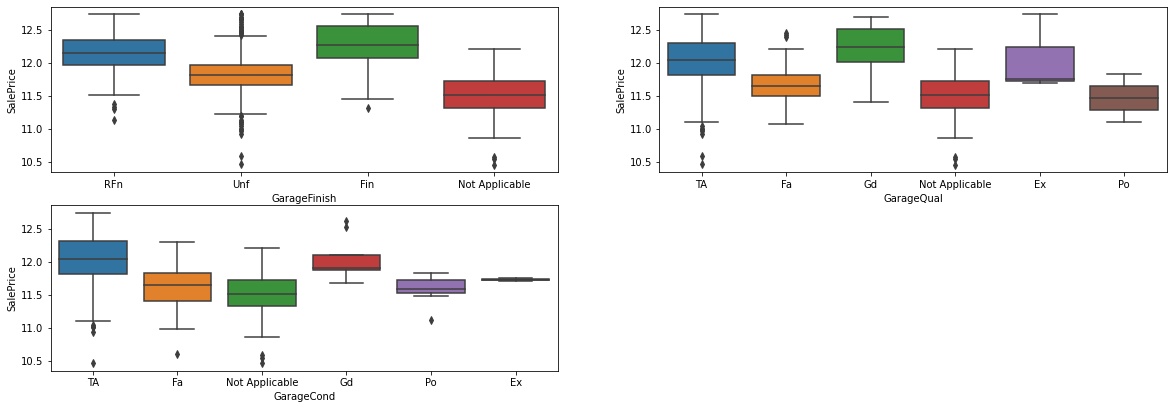

In [743]:
garage_features = ['GarageFinish','GarageQual','GarageCond']
draw_boxplot(garage_features)

**Observations**:
- SalePrice climbs up from unfinished garage to a finished garage
- 'Higher selling price for houses with good and excellent garage quality and lowest prices for houses with no garages
- only few houses have excellent garage condition

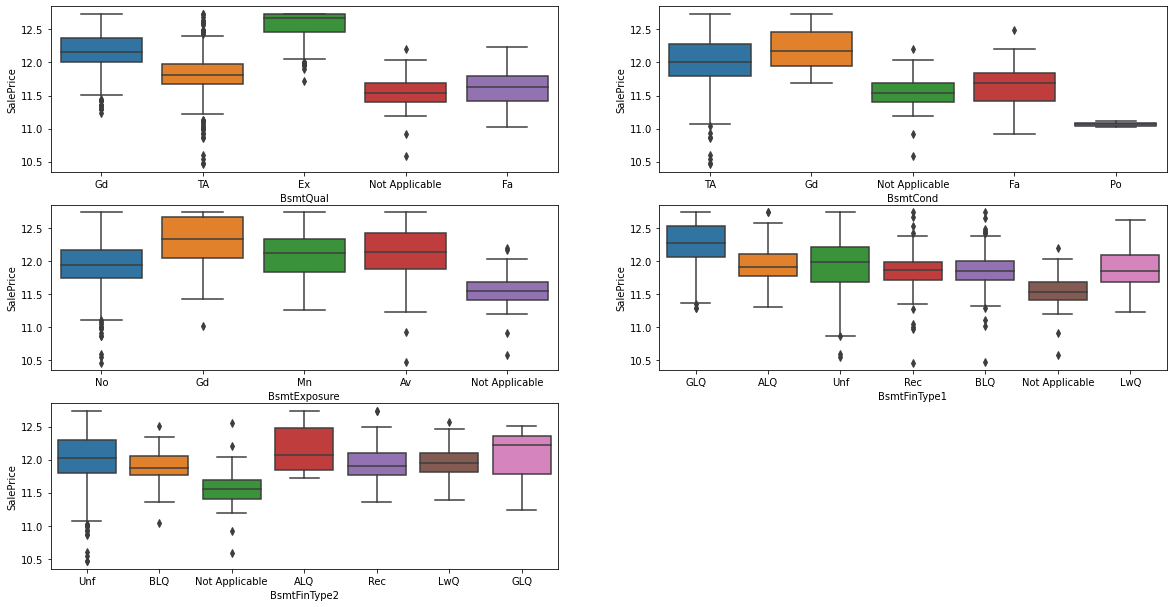

In [744]:
basement_features = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
draw_boxplot(basement_features)

**observations**:

- SalePrice highest for houses with excellent basement quality
- Properties with Good and typical basement conditions have higher selling price compared to basements with cracks.
- Prices high for basements that have good exposures
- houses with good living quarter basements have higher prices
- Properties with basements with an average Type 2 Living Quarters also have good selling prices

#### Re-mapping the categorical columns

Assign the numerical values to categories

In [745]:
housing['LotShape'] = housing['LotShape'].map(
    {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3})
housing['Utilities'] = housing['Utilities'].map(
    {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
housing['HouseStyle'] = housing['HouseStyle'].map(
    {'1Story': 0, '1.5Unf': 1, '1.5Fin': 2,  '2Story': 3, '2.5Unf': 4, '2.5Fin': 5, 'SFoyer': 6, 'SLvl': 7})
housing['ExterQual'] = housing['ExterQual'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['ExterCond'] = housing['ExterCond'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['BsmtQual'] = housing['BsmtQual'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['BsmtCond'] = housing['BsmtCond'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['BsmtExposure'] = housing['BsmtExposure'].map(
    {'Not Applicable': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map(
    {'Not Applicable': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map(
    {'Not Applicable': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
housing['HeatingQC'] = housing['HeatingQC'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['CentralAir'] = housing['CentralAir'].map({'N': 0, 'Y': 1})
housing['KitchenQual'] = housing['KitchenQual'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['GarageFinish'] = housing['GarageFinish'].map(
    {'Not Applicable': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
housing['GarageQual'] = housing['GarageQual'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['GarageCond'] = housing['GarageCond'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['Functional'] = housing['Functional'].map(
    {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7})
housing['FireplaceQu'] = housing['FireplaceQu'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [746]:
housing[['LotShape','Utilities','LandSlope','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
        'BsmtFinType2','HeatingQC','GarageFinish','KitchenQual','GarageQual','GarageCond','Functional','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1450 non-null   int64
 1   Utilities     1450 non-null   int64
 2   LandSlope     1450 non-null   int64
 3   HouseStyle    1450 non-null   int64
 4   ExterQual     1450 non-null   int64
 5   ExterCond     1450 non-null   int64
 6   BsmtQual      1450 non-null   int64
 7   BsmtCond      1450 non-null   int64
 8   BsmtExposure  1450 non-null   int64
 9   BsmtFinType1  1450 non-null   int64
 10  BsmtFinType2  1450 non-null   int64
 11  HeatingQC     1450 non-null   int64
 12  GarageFinish  1450 non-null   int64
 13  KitchenQual   1450 non-null   int64
 14  GarageQual    1450 non-null   int64
 15  GarageCond    1450 non-null   int64
 16  Functional    1450 non-null   int64
 17  FireplaceQu   1450 non-null   int64
dtypes: int64(18)
memory usage: 247.5 KB


In [747]:
housing.shape

(1450, 66)

#### Nominal features

In [748]:
nominal_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

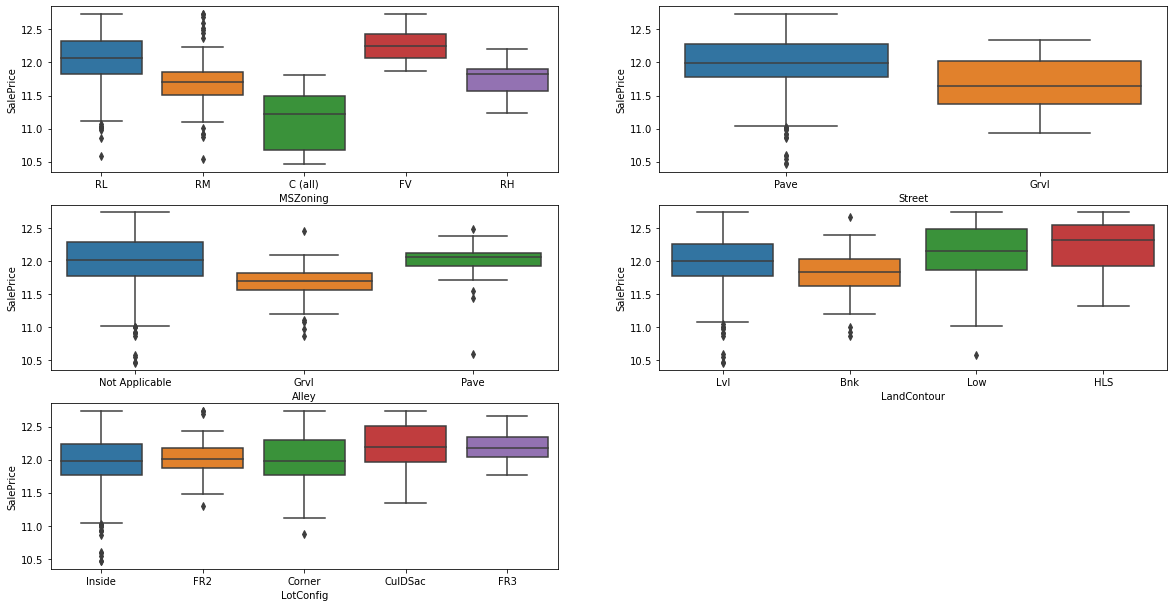

In [749]:
draw_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig'])

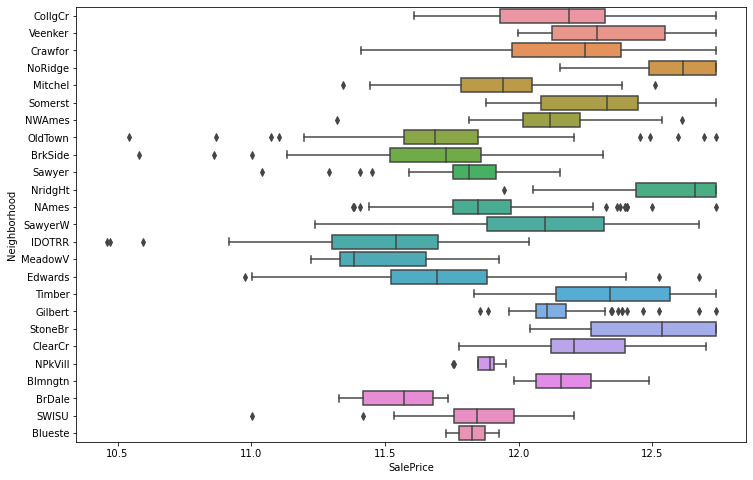

In [750]:
plt.figure(figsize = (12,8))
sns.boxplot(housing['SalePrice'],housing['Neighborhood'])
plt.show()

**observations**:

- Residual low density and Floating village Residential areas sell at higher prices
- Paved roads attract higher selling prices
- Houses majorily have with no valley access and sell at higher prices
- Australiants prefer Hillside houses and properties witha depression.Houses with a blanked contour are least preferred.
- Cul de sac properties sell at higher prices
- Houses in Northwidge heights,Stone Brook,Timberland,Northridge,Veenkar attract higher prices while properties in Meadow village,lowa DOT and Rail road nad Briardale have low prices.

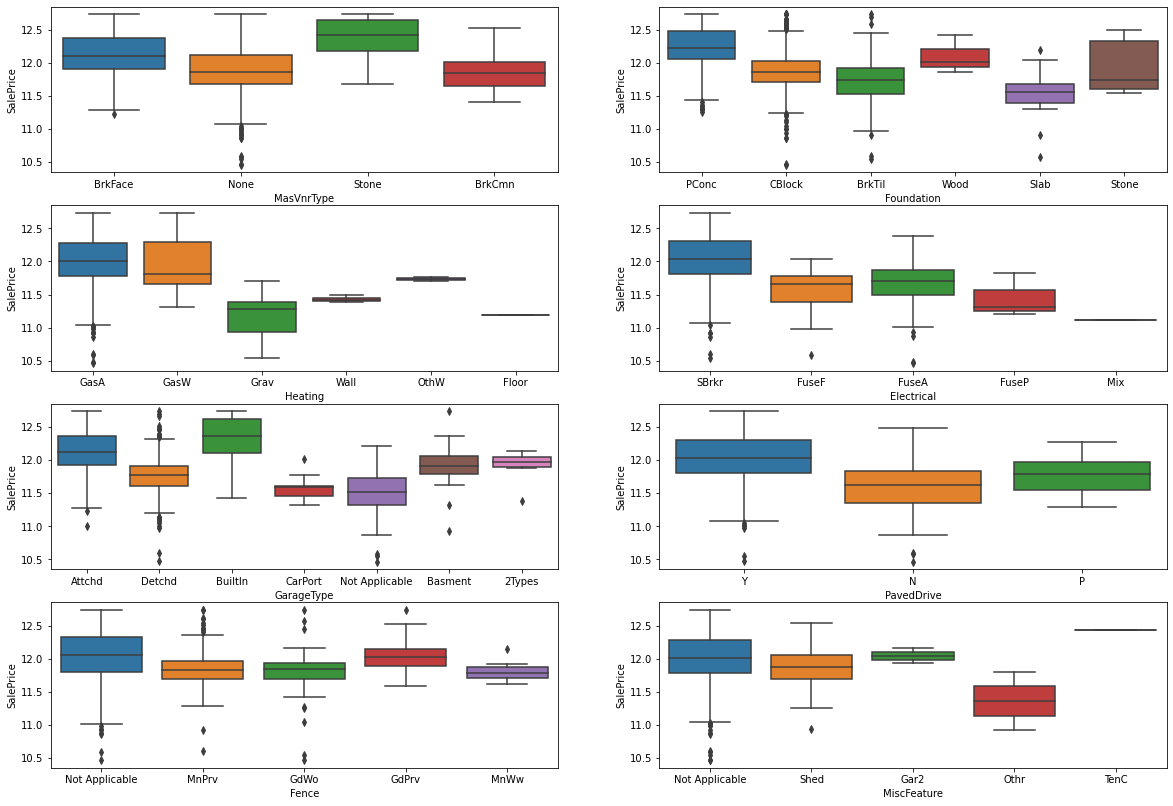

In [751]:
draw_boxplot(['MasVnrType','Foundation','Heating','Electrical','GarageType','PavedDrive','Fence','MiscFeature'])

**observations**:

- Houses with stone veener type have higher price while no veenere sell the lowest
- Houses with poured concrete foundation and houses with GasA or GasW and standard circuit Breakers sell at good prices.
- Properties with attached and built-in garages ahve higher SalePrice. Homes with Paved driveways also sell at higher prices.
- Most properties have no fences or miscallaneous features and still sell at higher prices

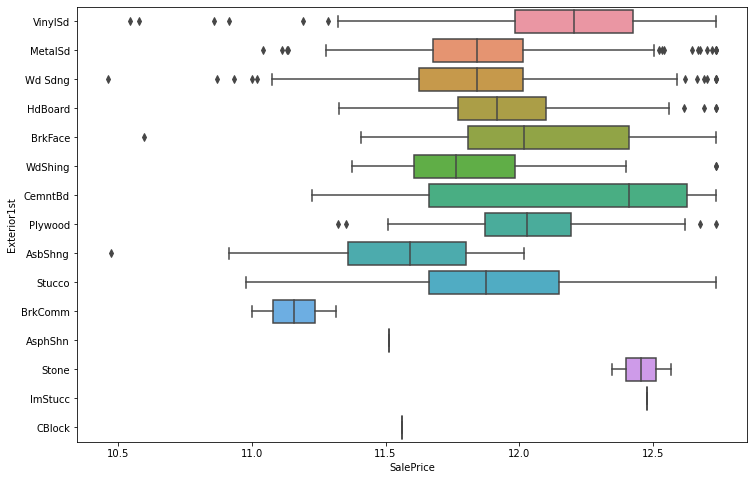

In [752]:
plt.figure(figsize = (12,8))
sns.boxplot(housing['SalePrice'],housing['Exterior1st'])
plt.show()

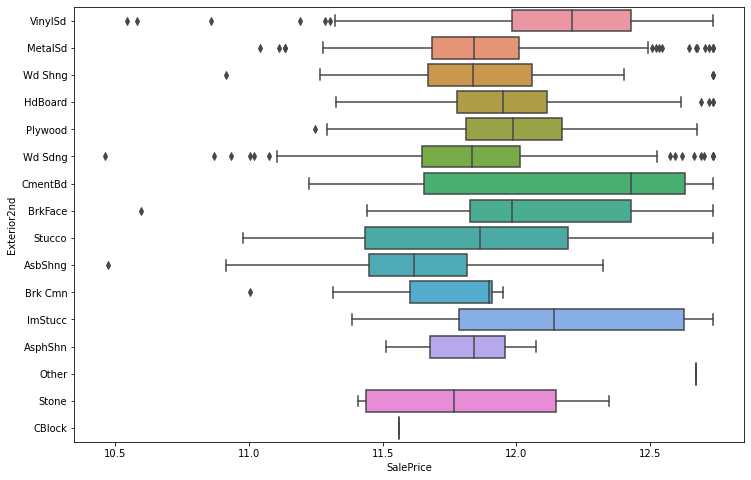

In [753]:
plt.figure(figsize = (12,8))
sns.boxplot(housing['SalePrice'],housing['Exterior2nd'])
plt.show()

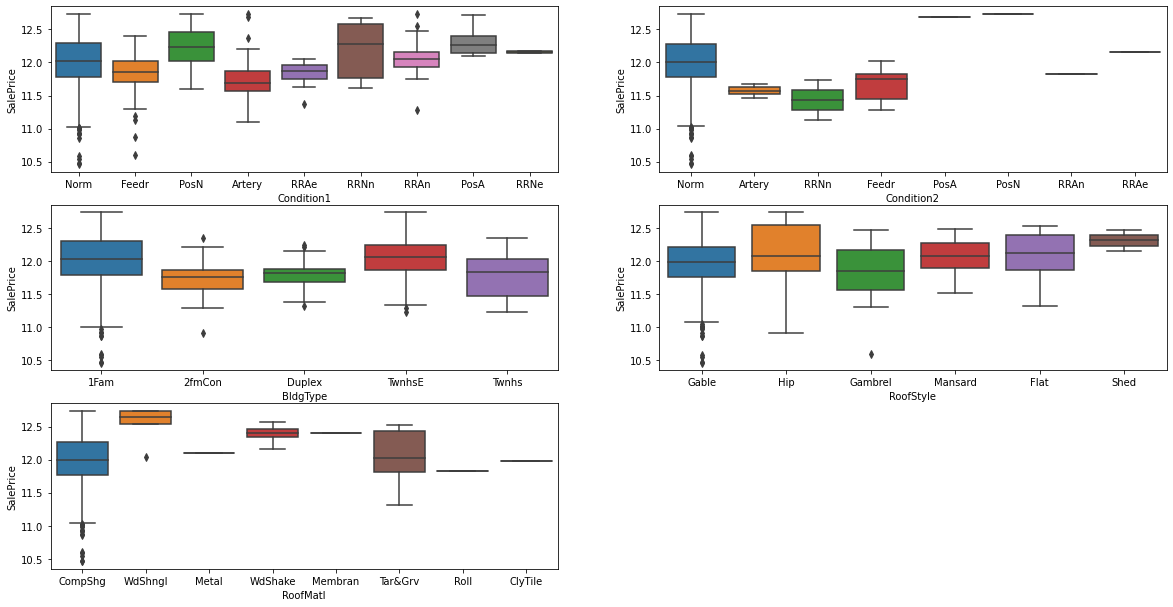

In [754]:
draw_boxplot(['Condition1','Condition2','BldgType','RoofStyle','RoofMatl'])

Observations:

- houses with cement board exteriors are more widely dispersed
- Houses with normal proximity conditions have higher saleprice
- Houses with Hip roofs sell at higher prices than other roof styles
- Wood Shingle roofs sell at higher prices while roofs made to standard shingle sell at the lowest

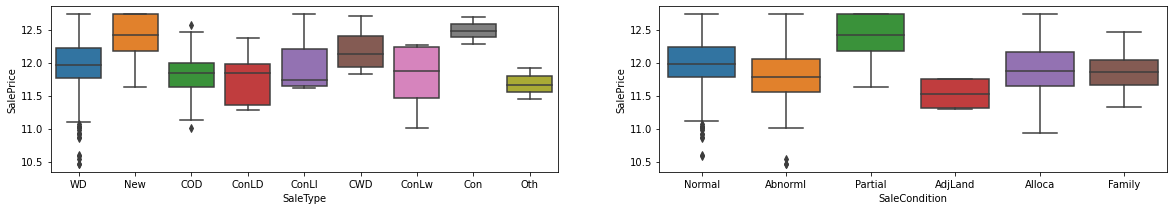

In [755]:
draw_boxplot(['SaleType','SaleCondition'])

Observations:

- Most of the houses are newly built or with warranty deed have high SalePrice among other types.
- Homes with Normal sale have high SalePrice

## Encoding

In [756]:
housing = pd.get_dummies(housing,columns = nominal_features, drop_first = True)

In [757]:
housing.shape

(1450, 187)

### Check for imbalnce in data

From the above boxplots, we saw that for some cases one label was dominantly present over others.This indicates imbalances in the dataset.
Lets remove predictors with labels that have same value on 85% or more records.

In [758]:
dummies_to_drop = []
for feature in housing.columns:
    if max(list(housing[feature].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.95:
        dummies_to_drop.append(feature)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['Utilities', 'MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', '

In [759]:
housing = housing.drop(columns=dummies_to_drop)

In [760]:
housing.shape

(1450, 89)

## Model building

### Splitting into Train and Test Data

In [761]:
y = housing.pop('SalePrice')
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.736811
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
30      10.596635
31      11.914048
32      12.100156
33      12.016726
34      12.533576
35      12.641097
36      11.884489
37      11.938193
38      11.599103
39      11.314475
40      11.982929
41      12.043554
42      11.877569
43      11.777211
44      11.856515
45      12.675764
46      12.387085
47      12.428015
48      11.635143
49      11.751942
50      12.083905
51      11.648330
52      11.608236
53      12.736811
54      11.775290
55      12

In [762]:
X = housing
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not Applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not Applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,0,3,7,5.0,19,19,...,0,0,0,1,0,1,0,1,1,0
1,20,80.0,9600.0,3,0,0,6,7.5,46,46,...,0,0,0,1,0,1,0,1,1,0
2,60,68.0,11250.0,0,0,3,7,5.0,21,20,...,0,0,0,1,0,1,0,1,1,0
3,70,60.0,9550.0,0,0,3,7,5.0,107,52,...,0,1,0,1,0,1,0,1,0,0
4,60,84.0,14260.0,0,0,3,8,5.0,22,22,...,0,0,0,1,0,1,0,1,1,0


#### Dividing into X and Y sets for data modelling

In [763]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [764]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1160, 88)
(1160,)
(290, 88)
(290,)


### Feature Scaling

In [765]:
## identify numerical features
## apply scaling only to numerical features
num_vars = X_train.select_dtypes(include = ['int64','float64']).columns
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold'],
      dtype='object')

In [766]:
## create a scaler object
scaler = StandardScaler()

As the penalty term depends upon the magnitude of each coefficient we need to standardize the data whenever working with Ridge/Lasso regression

In [767]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])


### Linear Regression model without Regularization

In [768]:
## Lets predict the sales using linear regression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [769]:
## print the coefficient and Intercept
print(lm.intercept_)
print(lm.coef_)

11.80769393462764
[-0.01050903  0.01430415  0.02537591 -0.00322042  0.00142994  0.00559752
  0.0785938   0.04522996 -0.03759786 -0.01426075 -0.00594359  0.00085347
 -0.00400467 -0.00100565  0.01224999  0.00709472  0.00505798  0.0320729
  0.00455525  0.01641174  0.00972446  0.01092389  0.11490272  0.10407608
  0.02437459  0.01258004  0.0118318   0.00411835  0.01071397 -0.00356334
 -0.02475186  0.00617678  0.01217028  0.00625316  0.01483499  0.00666389
  0.01353791  0.00850193  0.01111222  0.00077248  0.0080191   0.06173724
  0.00856497 -0.0125789  -0.01761042  0.03060122 -0.0038842  -0.00730891
 -0.04084164 -0.01969186 -0.01890779 -0.04409751  0.01572362 -0.03123606
 -0.02168353  0.08253824  0.03461278  0.06474619  0.0360168  -0.0692818
 -0.06143977 -0.08380541 -0.03114306 -0.04878686  0.02156294 -0.08052973
  0.05169847  0.03700473  0.0317898  -0.03319968  0.05406376  0.04233675
  0.03228365  0.06172334 -0.0131331   0.02646647 -0.00372662  0.05266086
  0.02881909  0.04527099  0.0369437

In [770]:
## Predict the variable using target model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

## calculate the metrics
metric = []
r2_train_lr = r2_score(y_train,y_pred_train)
print('r2_train_lr',r2_train_lr)
metric.append(r2_train_lr)


r2_test_lr = r2_score(y_test,y_pred_test)
print('r2_test_lr',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_pred_test)
print('mse_test_lr',mse_test_lr)
metric.append(mse_test_lr**0.5)



r2_train_lr 0.920159196510324
r2_test_lr 0.8437159755918769
rss1_lr 13.546251254764165
rss2_lr 6.172394612522734
mse_train_lr 0.011677802805831177
mse_test_lr 0.021284119353526667


### Residual Analysis 

Text(0, 0.5, 'residuals')

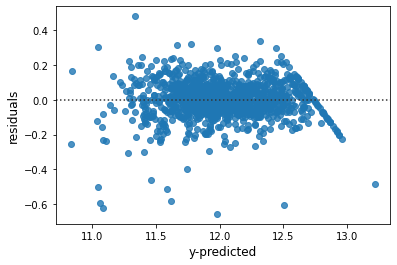

In [771]:
sns.residplot(y_pred_train,y_train - y_pred_train)
plt.xlabel('y-predicted',fontsize = 12)
plt.ylabel('residuals',fontsize = 12)

No pattern detected this indicates there is independence of errors and homoscedasticity

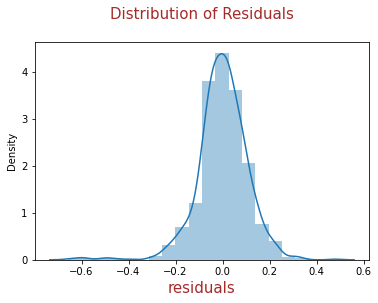

In [772]:
## check if residuals are normally distributed

sns.distplot((y_train - y_pred_train),bins = 20)

## Giving Title to the Chart
plt.title('Distribution of Residuals\n',fontdict = {'fontsize' : 15,'fontweight': 5,'color': 'brown'})

## Adding label to the axis
plt.xlabel('residuals',fontdict = {
    'fontsize' : 15,'fontweight': 5,'color': 'brown'
})

plt.show()


Error tems are normally distributed with mean 0 

## Ridge regression

In [773]:
## list of alphas to tune - if value too high it will lead to underfitting  if it is too low
## it will not handle the overfitting
params = {'alpha': [0.0001,0.001,0.05,0.1,
                   0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,
                   4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}

## Instatntiate the Ridge Regression
ridge = Ridge()

## cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [774]:
## Ridge Model results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007935,0.001420,0.004556,0.000797,0.0001,{'alpha': 0.0001},-0.086787,-0.084296,-0.090229,-0.082239,...,-0.086387,0.002846,24,-0.076090,-0.077841,-0.075597,-0.078497,-0.075634,-0.076732,0.001204
1,0.008006,0.002545,0.004808,0.003295,0.001,{'alpha': 0.001},-0.086786,-0.084292,-0.090228,-0.082239,...,-0.086386,0.002846,23,-0.076090,-0.077842,-0.075597,-0.078497,-0.075633,-0.076732,0.001204
2,0.008625,0.001274,0.001535,0.001906,0.05,{'alpha': 0.05},-0.086767,-0.084083,-0.090209,-0.082214,...,-0.086323,0.002873,22,-0.076092,-0.077902,-0.075593,-0.078486,-0.075628,-0.076740,0.001214
3,0.006385,0.002799,0.003407,0.003757,0.1,{'alpha': 0.1},-0.086749,-0.083908,-0.090189,-0.082190,...,-0.086268,0.002896,21,-0.076093,-0.077959,-0.075589,-0.078476,-0.075623,-0.076748,0.001224
4,0.007574,0.003582,0.004467,0.003967,0.2,{'alpha': 0.2},-0.086714,-0.083636,-0.090146,-0.082143,...,-0.086175,0.002933,20,-0.076097,-0.078044,-0.075583,-0.078459,-0.075616,-0.076760,0.001239


In [775]:
## printing the hyperparameter alpha 
print(model_cv.best_params_)

{'alpha': 20}


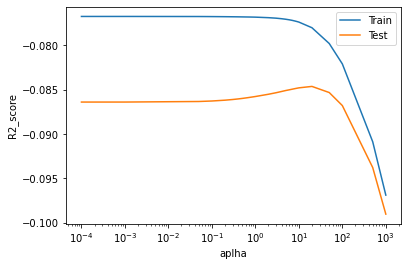

In [776]:
## plotting R2score vs alpha value
plt.plot(ridge_results['param_alpha'],ridge_results['mean_train_score'],label = "Train")
plt.plot(ridge_results['param_alpha'],ridge_results['mean_test_score'],label = "Test")
plt.xlabel('aplha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [777]:
model_cv.best_params_['alpha']
## wecan see that from the above graph is R-square of test and trains are closer between 10 and 50

20

In [778]:
## Fitting the Ridge Model for alpha = 20 andprinting coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00592287  0.01356466  0.02500415 -0.00407196  0.00330802  0.0034251
  0.07753148  0.04477323 -0.03524256 -0.01483562 -0.00353921  0.00632595
 -0.00333168  0.0041055   0.00940464  0.00755183  0.00568306  0.03206614
  0.00480045  0.01642376  0.01130222  0.01235111  0.10302961  0.08901104
  0.0222085   0.01663631  0.01501595  0.00529044  0.01084886  0.00128611
 -0.02339282  0.00646053  0.01576391  0.00760544  0.01868827  0.007513
  0.00994216  0.00896701  0.01125028  0.00080152  0.00783444  0.02746278
 -0.02138135 -0.01071161 -0.01498178  0.02443479 -0.00537601 -0.00319202
 -0.02365547 -0.01759122 -0.00590575 -0.02694117  0.01038232 -0.02150883
 -0.011875    0.04285636  0.00819189  0.04778984  0.02002371 -0.02557231
 -0.01550772 -0.02989798  0.00493545 -0.01172765  0.00544831 -0.03960741
  0.00437354  0.00182335  0.00121686 -0.01294141  0.01589466  0.00226025
 -0.00010843  0.02184321 -0.01640207  0.02401527 -0.00432359  0.02348165
  0.0021988   0.01394761  0.00050265  0.02677245  0.01

In [779]:
## Lets calculate some metrics  such as R2_score ,RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)


## calculate the metrics
metric2 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2.append(r2_train_lr)


r2_test_lr = r2_score(y_test,y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train , y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2.append(mse_test_lr**0.5)


r2_train_lr 0.9174694564659329
r2_test_lr 0.8513545971135366
rss1_lr 14.00260806555244
rss2_lr 5.870709353866561
mse_train_lr 0.012071213849614173
mse_test_lr 0.020243825358160553


## Lasso regression

In [780]:
## Instatntiate the lasso Regression
lasso = Lasso()

## cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

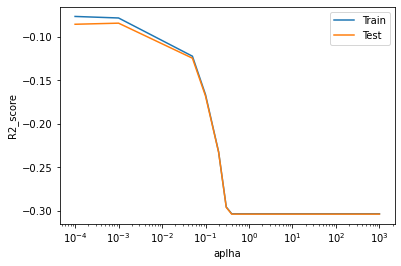

In [781]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()
## plotting R2score vs alpha value
plt.plot(lasso_results['param_alpha'],lasso_results['mean_train_score'],label = "Train")
plt.plot(lasso_results['param_alpha'],lasso_results['mean_test_score'],label = "Test")
plt.xlabel('aplha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [782]:
## printing the hyperparameter alpha 
print(model_cv.best_params_)

{'alpha': 0.001}


In [783]:
## Fitting the Lasso Model for alpha = 0.001 andprinting coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-7.62069518e-04  1.05186894e-02  2.47747073e-02 -4.75232861e-03
  5.53505068e-03 -0.00000000e+00  8.23429601e-02  4.46288670e-02
 -3.95962413e-02 -1.19822770e-02 -6.67686644e-04  7.21696830e-03
 -2.90838047e-03  6.66672738e-03  9.82282973e-03  7.16552437e-03
  3.82445425e-03  2.75499671e-02  2.46846651e-03  9.62239152e-03
  1.24217548e-02  1.15340976e-02  1.16282829e-01  9.76151335e-02
  2.08392899e-02  9.99596126e-03  9.87430727e-03  1.21799123e-03
  1.05645501e-02 -0.00000000e+00 -2.33200711e-02  2.88520322e-03
  1.72760557e-02  6.24027675e-03  1.89769424e-02  5.97963541e-03
  1.39854889e-02  7.54541505e-03  1.00081657e-02  5.93299611e-05
  6.35022582e-03  1.81588849e-02 -2.94188986e-02 -0.00000000e+00
 -6.60543445e-03  1.00655642e-02 -3.52237601e-03  0.00000000e+00
 -6.28266855e-03 -0.00000000e+00  0.00000000e+00 -8.51076477e-03
  0.00000000e+00 -1.13274249e-03 -0.00000000e+00  4.36519613e-02
  0.00000000e+00  4.79703022e-02  0.00000000e+00 -4.04855621e-03
 -0.00000000e+00 -1.56491

In [784]:
## Lets calculate some metrics  such as R2_score ,RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


## calculate the metrics
metric3 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print('r2_train_lr',r2_train_lr)
metric3.append(r2_train_lr)


r2_test_lr = r2_score(y_test,y_pred_test)
print('r2_test_lr',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train , y_pred_train)
print('mse_train_lr',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print('mse_test_lr',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr 0.9151081944777715
r2_test_lr 0.8494451094190429
rss1_lr 14.40323339460608
rss2_lr 5.946124045821206
mse_train_lr 0.012416580512591448
mse_test_lr 0.020503876020073124


In [785]:
## Creating a table which contain all the metrics

lr_table = {'Metric':['R2 Score (Train)', 'R2 score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table,columns = ['Metric','Linear Regression'])



rg_metric = pd.Series(metric2,name = 'Ridge (λ = 20.0)')
ls_metric = pd.Series(metric3,name = 'Lasso (λ = 0.001)')

final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis =1)
final_metric

,Metric,Linear Regression,Ridge (λ = 20.0),Lasso (λ = 0.001)
0,R2 Score (Train),0.920159,0.917469,0.915108
1,R2 score (Test),0.843716,0.851355,0.849445
2,RSS (Train),13.546251,14.002608,14.403233
3,RSS (Test),6.172395,5.870709,5.946124
4,MSE (Train),0.108064,0.109869,0.111430
5,MSE (Test),0.145891,0.142281,0.143192


Overall we have the decent model

### changes in the coefficients after Regularization

In [786]:
betas = pd.DataFrame(index = X.columns)

In [787]:
betas.rows = X.columns

In [788]:
betas['Linear'] = lm.coef_
betas['Ridge (λ = 20.0)'] = ridge.coef_
betas['Lasso (λ = 0.001)'] = lasso.coef_

In [789]:
pd.set_option('display.max_rows',None)
betas.head(70)

,Linear,Ridge (λ = 20.0),Lasso (λ = 0.001)
MSSubClass,-0.010509,-0.005923,-0.000762
LotFrontage,0.014304,0.013565,0.010519
LotArea,0.025376,0.025004,0.024775
LotShape,-0.003220,-0.004072,-0.004752
LandSlope,0.001430,0.003308,0.005535
HouseStyle,0.005598,0.003425,-0.000000
OverallQual,0.078594,0.077531,0.082343
OverallCond,0.045230,0.044773,0.044629
YearBuilt,-0.037598,-0.035243,-0.039596
YearRemodAdd,-0.014261,-0.014836,-0.011982


## Final Model

**Ridge Model** is better than **lasso Model**

*Here Lasso and Ridge models have very little difference in values of R-squared or MSE in both test and train datasets.Asthe R-Squared value hasnt gone up after feature selection using the lasso model,it is evident that most predictors do impact the response variable here. so Ridge is better fit.*

**Top Predictor Variables**

In [790]:
## Positive Coefficients
list(betas['Ridge (λ = 20.0)'].sort_values(ascending= False).head(5).index)
     

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleCondition_Normal',
 'Condition1_Norm']

In [791]:
## negative Coefficients
list(betas[betas['Ridge (λ = 20.0)']<0]['Ridge (λ = 20.0)'].sort_values().head(5).index)

['Exterior1st_Wd Sdng',
 'YearBuilt',
 'Exterior1st_HdBoard',
 'Neighborhood_NWAmes',
 'RoofStyle_Gable']

## Summary

**Top 5 positive predictor varaibles:** '1stFlrSF', '2ndFlrSF', 'OverallQual', 'SaleCondition_Normal', 'Condition1_Norm'

**Top 3 Negative predictor varaibles:** 'YearBuilt', 'Exterior1st_Wd Sdng', 'Exterior1st_HdBoard'

These varaibles are significant in predicting the price of house ina Australia

- People after living in first and second floor-bigger  lot area,higher the Price
- Newly built houses have higher selling rates.As the age increases of a house,lower it value becomes
- better the overall quality of house also drive up the house
- Houses with normal sales condition sell at better rates which homes with deductions or damages sell at lower prices
- Homes in Residential medium density sell at lower prices
- Roofs made of woods siding or shingles were sold at low prices
- Location of the house determines its selling price

## Problem Statement - Part 2

#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

Ridge: λ from 20 to 40

In [792]:
#Fitting Ridge model for alpha = 40 
alpha = 20*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# print(ridge.coef_)


## Predict the variable using target model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

## calculate the metrics
metric2_2 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print('r2_train_lr',r2_train_lr)
metric2_2.append(r2_train_lr)


r2_test_lr = r2_score(y_test,y_pred_test)
print('r2_test_lr',r2_test_lr)
metric2_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric2_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric2_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train , y_pred_train)
print('mse_train_lr',mse_train_lr)
metric2_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print('mse_test_lr',mse_test_lr)
metric2_2.append(mse_test_lr**0.5)



r2_train_lr 0.920159196510324
r2_test_lr 0.8437159755918769
rss1_lr 13.546251254764165
rss2_lr 6.172394612522734
mse_train_lr 0.011677802805831177
mse_test_lr 0.021284119353526667


In [793]:
#Fitting Ridge model for alpha = 40 
alpha = 0.001*2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# print(ridge.coef_)


## Predict the variable using target model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

## calculate the metrics
metric3_2 = []
r2_train_lr = r2_score(y_train,y_pred_train)
print('r2_train_lr',r2_train_lr)
metric3_2.append(r2_train_lr)


r2_test_lr = r2_score(y_test,y_pred_test)
print('r2_test_lr',r2_test_lr)
metric3_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr',rss1_lr)
metric3_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr',rss2_lr)
metric3_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train , y_pred_train)
print('mse_train_lr',mse_train_lr)
metric3_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print('mse_test_lr',mse_test_lr)
metric3_2.append(mse_test_lr**0.5)



r2_train_lr 0.9107997166906895
r2_test_lr 0.8485021616181867
rss1_lr 15.134234587961185
rss2_lr 5.983365510186724
mse_train_lr 0.013046753955138952
mse_test_lr 0.02063229486271284


In [794]:
## Metrics

rg_metric_40 = pd.Series(metric2_2,name = 'Ridge (λ = 40)')
ls_metric_002 = pd.Series(metric3_2,name = 'Lasso (λ = 0.002)')

final_metric2 = pd.concat([lr_metric,rg_metric,ls_metric,rg_metric_40,ls_metric_002],axis =1)
final_metric2


,Metric,Linear Regression,Ridge (λ = 20.0),Lasso (λ = 0.001),Ridge (λ = 40),Lasso (λ = 0.002)
0,R2 Score (Train),0.920159,0.917469,0.915108,0.920159,0.910800
1,R2 score (Test),0.843716,0.851355,0.849445,0.843716,0.848502
2,RSS (Train),13.546251,14.002608,14.403233,13.546251,15.134235
3,RSS (Test),6.172395,5.870709,5.946124,6.172395,5.983366
4,MSE (Train),0.108064,0.109869,0.111430,0.108064,0.114222
5,MSE (Test),0.145891,0.142281,0.143192,0.145891,0.143639


##### Co -efficients

In [795]:
betas['Ridge (λ = 40.0)'] = ridge.coef_
betas['lasso (λ = 0.002)'] = lasso.coef_
pd.set_option('display.max_rows',None)
betas

,Linear,Ridge (λ = 20.0),Lasso (λ = 0.001),Ridge (λ = 40.0),lasso (λ = 0.002)
MSSubClass,-0.010509,-0.005923,-0.000762,-0.004078,-0.000614
LotFrontage,0.014304,0.013565,0.010519,0.013360,0.009269
LotArea,0.025376,0.025004,0.024775,0.025038,0.026296
LotShape,-0.003220,-0.004072,-0.004752,-0.004657,-0.005185
LandSlope,0.001430,0.003308,0.005535,0.004626,0.006599
HouseStyle,0.005598,0.003425,-0.000000,0.002428,-0.000000
OverallQual,0.078594,0.077531,0.082343,0.075991,0.084681
OverallCond,0.045230,0.044773,0.044629,0.043294,0.042530
YearBuilt,-0.037598,-0.035243,-0.039596,-0.032808,-0.044185
YearRemodAdd,-0.014261,-0.014836,-0.011982,-0.015604,-0.012517


In [796]:
list(betas['Ridge (λ = 20.0)'].sort_values(ascending = False).head(10).index)
     

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleCondition_Normal',
 'Condition1_Norm',
 'OverallCond',
 'Neighborhood_Somerst',
 'SaleType_New',
 'BsmtFinSF1',
 'MSZoning_RL']

In [797]:
list(betas['Ridge (λ = 40.0)'].sort_values(ascending = False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleCondition_Normal',
 'OverallCond',
 'Condition1_Norm',
 'Neighborhood_Somerst',
 'BsmtFinSF1',
 'SaleType_New',
 'LotArea']

In [798]:
list(betas['Lasso (λ = 0.001)'].sort_values(ascending = False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleType_New',
 'SaleCondition_Normal',
 'Condition1_Norm',
 'OverallCond',
 'Neighborhood_Somerst',
 'BsmtFinSF1',
 'Foundation_PConc']

In [799]:
list(betas['lasso (λ = 0.002)'].sort_values(ascending = False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleType_New',
 'SaleCondition_Normal',
 'OverallCond',
 'Condition1_Norm',
 'LotArea',
 'Foundation_PConc',
 'BsmtFinSF1']

#### Drop five most important predictor varaibles in the lasso


In [800]:
## positive coefficients
list(betas['Lasso (λ = 0.001)'].sort_values(ascending = False).head(5).index)

['1stFlrSF', '2ndFlrSF', 'OverallQual', 'SaleType_New', 'SaleCondition_Normal']

In [801]:
X_train_new = X_train.drop(columns = ['1stFlrSF','2ndFlrSF','SaleType_New', 'OverallQual', 'SaleCondition_Normal'])

In [802]:
X_test_new = X_test.drop(columns = ['1stFlrSF','2ndFlrSF','SaleType_New', 'OverallQual', 'SaleCondition_Normal'])

In [803]:
lasso =Lasso()

## cross validation
## Instatntiate the Ridge Regression
lasso = Lasso()

## cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [804]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026792,0.013556,0.004183,0.002733,0.0001,{'alpha': 0.0001},-0.086579,-0.082714,-0.089637,-0.081857,...,-0.085762,0.003011,2,-0.076132,-0.078204,-0.075597,-0.078376,-0.075591,-0.076780,0.001250
1,0.009826,0.001213,0.004214,0.003016,0.001,{'alpha': 0.001},-0.087389,-0.080550,-0.087710,-0.077363,...,-0.084496,0.004688,1,-0.077970,-0.079935,-0.077708,-0.080004,-0.077098,-0.078543,0.001199
2,0.010198,0.000896,0.005594,0.003289,0.05,{'alpha': 0.05},-0.124331,-0.119231,-0.123245,-0.124249,...,-0.124747,0.004382,3,-0.122606,-0.122799,-0.120960,-0.125391,-0.120553,-0.122462,0.001710
3,0.008122,0.003191,0.003837,0.004344,0.1,{'alpha': 0.1},-0.167561,-0.158824,-0.165592,-0.177553,...,-0.168173,0.006204,4,-0.167466,-0.166116,-0.166641,-0.169864,-0.163090,-0.166635,0.002189
4,0.007767,0.001421,0.003400,0.003566,0.2,{'alpha': 0.2},-0.240416,-0.223735,-0.234086,-0.238894,...,-0.232724,0.006615,5,-0.234233,-0.231920,-0.232610,-0.232694,-0.230381,-0.232368,0.001248


In [805]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [806]:
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha =alpha)
lasso.fit(X_train_new,y_train)

Lasso(alpha=0.001)

In [807]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3_3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric3_3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric3_3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric3_3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric3_3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric3_3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric3_3.append(mse_test_lr**0.5)

r2_train_lr 0.8798920910606364
r2_test_lr 0.8298304854481713
rss1_lr 20.378200632554243
rss2_lr 6.720798231381625
mse_train_lr 0.017567414338408832
mse_test_lr 0.023175166315109054


In [808]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff["Lasso"] = lasso.coef_
model_coeff.sort_values(by="Lasso",ascending = False).head(5)



,Lasso
BsmtFinSF1,0.071944
BsmtUnfSF,0.053934
Neighborhood_Somerst,0.053766
TotRmsAbvGrd,0.051647
FullBath,0.050405


In [809]:
list(model_coeff.sort_values(by="Lasso",ascending=False).head(5).index)

['BsmtFinSF1', 'BsmtUnfSF', 'Neighborhood_Somerst', 'TotRmsAbvGrd', 'FullBath']

In [810]:
lr_table = {'Metric': ['R2 score (Train)','R2 score (Test)','RSS(Train)','RSS(Test)','MSE (Train)','MSE (Test)']}
lr_metric = pd.DataFrame(lr_table,columns=['Metric'])

In [811]:
ls_metric_002 = pd.Series(metric3_2,name = 'Lasso: λ = 0.002')
ls_metric_003 = pd.Series(metric3_3,name = 'Lasso:  drop 5 var')


final_metric3 = pd.concat(
    [lr_metric,ls_metric_002,ls_metric_003],axis =1)

final_metric3

,Metric,Lasso: λ = 0.002,Lasso: drop 5 var
0,R2 score (Train),0.910800,0.879892
1,R2 score (Test),0.848502,0.829830
2,RSS(Train),15.134235,20.378201
3,RSS(Test),5.983366,6.720798
4,MSE (Train),0.114222,0.132542
5,MSE (Test),0.143639,0.152234
